In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Link to the core (Experiment) module

You have to input the path of the pySPC library to the system path so that it can be found during the import statement. For import command see 
__[The Definitive Guide to Python import Statements](https://chrisyeh96.github.io/2017/08/08/definitive-guide-python-imports.html)__

In [9]:
import os
import sys

# print(os.path.abspath('.'))
# print(os.path.abspath('../core'))

py_SPC_path = os.path.normpath(r"C:\TRAVAIL\recherche\code\pySPC")
print(py_SPC_path)
sys.path.insert(0, py_SPC_path)

from core import Experiment

C:\TRAVAIL\recherche\code\pySPC


C:\TRAVAIL\recherche\code\pySPC\test\spc\fluo2.spc


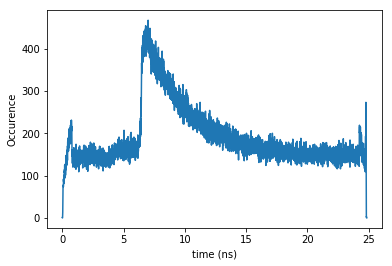

{'t0': 2.438457095631074, 'amp': 965.3408243662878, 'tau': 3.5561154210150763, 'cst': 144.3819718123254}


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


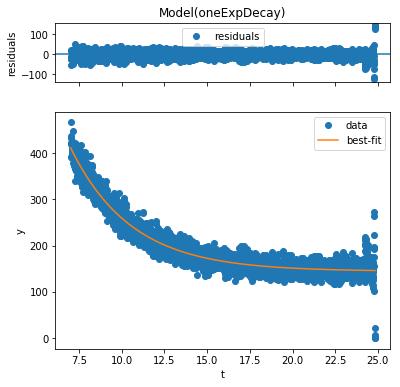

In [14]:
# Relative path
filepath = "test/spc/fluo2.spc"

filepath = os.path.normpath(os.path.join(py_SPC_path, filepath))
print(filepath)

# Create the main (model) object and fill it with the spc file
exp = Experiment.Experiment(filepath)

# Calculate the microtime histogramm and fill the corresponding result object
exp.micro_time_life_time()

# Alias variables from the results object.
# There are as many lifetime results as there are channels.
lifetime_histogram = exp.results.lifetimes[0].data
lifetime_time_axis = exp.results.lifetimes[0].timeAxis

# Plot
plt.plot(lifetime_time_axis, lifetime_histogram)
plt.xlabel("time (ns)")
plt.ylabel("Occurence")
plt.show()

# Fit
t0_ini = 7
amp_ini = 457
tau_ini = 3
cst_ini = 150


exp.results.lifetimes[0].set_model("One Decay")
# exp.results.lifetimes[0].guess(idx_start=idx_decay_curve_start, idx_end=-1)
exp.results.lifetimes[0].set_params([t0_ini, amp_ini, tau_ini, tau_ini, cst_ini])
fit_results = exp.results.lifetimes[0].fit(idx_start=t0_ini, idx_end=-1)
print(fit_results)


print(fit_results.best_values)

fig, GridSpec  = fit_results.plot()
fig.show()
fig.savefig("test2.png")

# # Plot
# plt.plot(lifetime_time_axis, lifetime_histogram)
# plt.plot(lifetime_time_axis[], fit_results.best_fit)
# plt.xlabel("time (ns)")
# plt.ylabel("Occurence")
# plt.show()